# Chuẩn bị dữ liệu

#### import thư viện

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

C:\Users\hieu\AppData\Local\Temp\ipykernel_9972\2491140510.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Thêm data

In [2]:
df = pd.read_csv('./data/FPT Historical Data_with_NaN.csv')

#### xem sơ bộ data

In [3]:
df.shape

(3032, 7)

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/29/2024,"109,000.0","108,200.0","109,400.0","107,700.0",2.82M,0.46%
1,02/28/2024,"108,500.0","108,000.0","108,500.0","106,300.0",3.46M,0.56%
2,02/27/2024,"107,900.0","108,500.0","109,500.0","107,400.0",2.80M,-0.09%
3,02/26/2024,"108,000.0","103,900.0","108,000.0","103,500.0",4.47M,3.95%
4,02/23/2024,"103,900.0","105,500.0","106,700.0","103,300.0",4.10M,-0.67%


# Tiền xử lí dữ liệu

##### Kiểm tra type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3032 non-null   object
 1   Price     2982 non-null   object
 2   Open      2982 non-null   object
 3   High      2982 non-null   object
 4   Low       2982 non-null   object
 5   Vol.      2982 non-null   object
 6   Change %  2982 non-null   object
dtypes: object(7)
memory usage: 165.9+ KB


#### Sửa các giá trị Price, Open, High, Low thành float. Đặt Date thành index

In [6]:
df["Date"] = pd.to_datetime(df.Date,format="%m/%d/%Y")
df.set_index("Date", inplace=True)

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

#### Sửa các kí tự K, M, B của Vol, đặt giá trị thành float.

In [7]:
import re

def convert_to_float(x):
    if isinstance(x, str):
        number_part = re.findall(r'\d*\.?\d+', x)[0]
        unit_part = re.sub(r'\d*\.?\d+', '', x)

        if unit_part == 'K':
            multiplier = 1000
        elif unit_part == 'M':
            multiplier = 1000000
        elif unit_part == 'B':
            multiplier = 1000000000
        else:
            multiplier = 1

        return float(number_part) * multiplier
    else:
        return x

df['Vol.'] = df['Vol.'].apply(convert_to_float)


#### Loại bỏ kí tự %, chuyển thành dạng float

In [8]:
df['Change %'] = df['Change %'].str.rstrip('%')

df['Change %'] = df['Change %'].astype(float)

#### Xem lại dữ liệu đã được chuyển thành float chưa

In [9]:
print(df)

               Price      Open      High       Low       Vol.  Change %
Date                                                                   
2024-02-29  109000.0  108200.0  109400.0  107700.0  2820000.0      0.46
2024-02-28  108500.0  108000.0  108500.0  106300.0  3460000.0      0.56
2024-02-27  107900.0  108500.0  109500.0  107400.0  2800000.0     -0.09
2024-02-26  108000.0  103900.0  108000.0  103500.0  4470000.0      3.95
2024-02-23  103900.0  105500.0  106700.0  103300.0  4100000.0     -0.67
...              ...       ...       ...       ...        ...       ...
2012-01-09    6742.5    6714.9    6742.5    6659.6   219830.0      0.41
2012-01-06    6714.9    6701.1    6714.9    6673.4   315300.0      0.83
2012-01-05    6659.6    6673.4    6756.3    6645.8   309570.0     -2.03
2012-01-04    6797.8    6811.6    6811.6    6784.0   141740.0      0.00
2012-01-03    6797.8    6562.9    6825.4    6562.9   356900.0     -1.01

[3032 rows x 6 columns]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3032 entries, 2024-02-29 to 2012-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2982 non-null   float64
 1   Open      2982 non-null   float64
 2   High      2982 non-null   float64
 3   Low       2982 non-null   float64
 4   Vol.      2982 non-null   float64
 5   Change %  2982 non-null   float64
dtypes: float64(6)
memory usage: 165.8 KB


#### Kiểm tra các giá trị null, NaN và sửa bằng phương pháp nội suy

In [11]:
df.isna().sum()
df.isnull().sum()

Price       50
Open        50
High        50
Low         50
Vol.        50
Change %    50
dtype: int64

In [12]:
df = df.interpolate()

print(df)


               Price      Open      High       Low       Vol.  Change %
Date                                                                   
2024-02-29  109000.0  108200.0  109400.0  107700.0  2820000.0      0.46
2024-02-28  108500.0  108000.0  108500.0  106300.0  3460000.0      0.56
2024-02-27  107900.0  108500.0  109500.0  107400.0  2800000.0     -0.09
2024-02-26  108000.0  103900.0  108000.0  103500.0  4470000.0      3.95
2024-02-23  103900.0  105500.0  106700.0  103300.0  4100000.0     -0.67
...              ...       ...       ...       ...        ...       ...
2012-01-09    6742.5    6714.9    6742.5    6659.6   219830.0      0.41
2012-01-06    6714.9    6701.1    6714.9    6673.4   315300.0      0.83
2012-01-05    6659.6    6673.4    6756.3    6645.8   309570.0     -2.03
2012-01-04    6797.8    6811.6    6811.6    6784.0   141740.0      0.00
2012-01-03    6797.8    6562.9    6825.4    6562.9   356900.0     -1.01

[3032 rows x 6 columns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3032 entries, 2024-02-29 to 2012-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3032 non-null   float64
 1   Open      3032 non-null   float64
 2   High      3032 non-null   float64
 3   Low       3032 non-null   float64
 4   Vol.      3032 non-null   float64
 5   Change %  3032 non-null   float64
dtypes: float64(6)
memory usage: 165.8 KB


In [14]:
df.isna().sum()
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

# Mô tả dữ liệu

In [15]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,3032.000000,3032.000000,3032.000000,3032.000000,3.032000e+03,3032.000000
mean,33815.471075,33807.120861,34176.956712,33463.373747,2.069698e+06,0.107932
std,28572.021523,28561.133581,28886.658638,28246.910149,1.643621e+06,1.608871
min,5840.900000,5786.900000,5876.800000,5769.000000,1.897000e+04,-14.020000
25%,12751.025000,12751.025000,12997.487500,12611.200000,9.159175e+05,-0.650000
50%,22022.400000,22068.250000,22208.600000,21882.800000,1.640000e+06,0.000000
75%,52755.750000,52685.500000,53229.900000,52334.050000,2.720000e+06,0.860000
max,109000.000000,108500.000000,109500.000000,107700.000000,1.217000e+07,7.000000


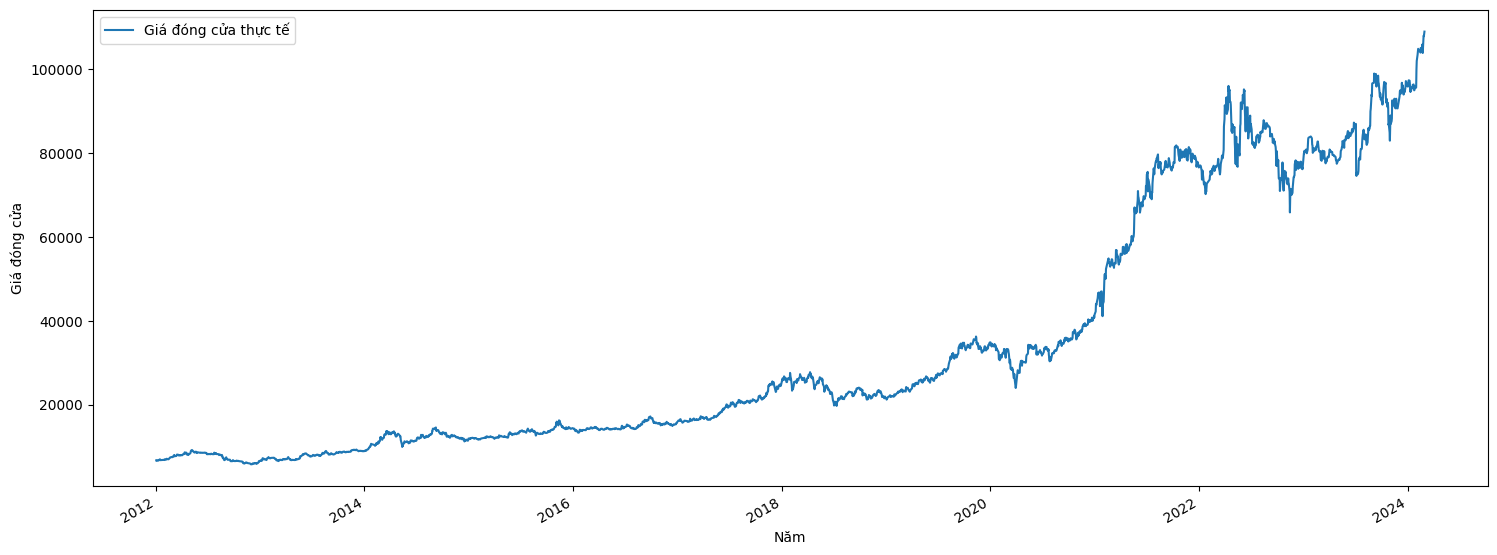

In [16]:
fig, ax = plt.subplots(figsize=(18, 7))
df['Price'].plot(label = 'Giá đóng cửa thực tế')
ax.set_xlabel('Năm')
ax.set_ylabel('Giá đóng cửa')
plt.legend(loc='best')
plt.show()

# Chuẩn bị mô hình

#### Scale dữ liệu

In [17]:
features = ['Open', 'High', 'Low', 'Vol.', 'Change %']

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
X = pd.DataFrame(columns=features, data=X, index=df.index)  # Thêm index=df.index
X.head()

,Open,High,Low,Vol.,Change %
Date,,,,,
2024-02-29,0.997079,0.999035,1.000000,0.230518,0.688868
2024-02-28,0.995132,0.990350,0.986265,0.283188,0.693625
2024-02-27,1.000000,1.000000,0.997057,0.228872,0.662702
2024-02-26,0.955215,0.985524,0.958796,0.366309,0.854900
2024-02-23,0.970792,0.972979,0.956834,0.335859,0.635109


In [18]:
X.to_csv('./data/FPT Historical Data_Demo.csv', index=True)

In [19]:
y = pd.DataFrame(df['Price'])

X_train, X_test = train_test_split(X, test_size=0.3, random_state=46)
y_train, y_test = train_test_split(y.values.ravel(), test_size=0.3, random_state=46)

In [20]:
y_test

array([ 85300.  ,  15272.  ,  21082.9 ,  23749.7 ,  80398.  ,   7155.3 ,
         8318.1 ,  16140.2 ,   8415.8 ,   8008.  ,  23620.1 ,  24872.4 ,
         7192.4 ,  31315.4 ,  32029.8 ,  11329.9 ,  73000.  ,  13894.6 ,
        29946.1 ,  81500.  ,  13122.5 ,  39970.7 ,  35896.4 ,  34411.2 ,
        85901.  ,  16716.7 ,  14523.4 ,  13984.4 ,  14915.3 ,  26637.6 ,
        85506.  ,  22547.5 ,  23274.7 ,  78700.  ,  12472.6 ,  26552.6 ,
        30551.5 ,  13772.2 ,  14373.7 ,  10790.4 ,  80100.  ,  78000.  ,
         9123.1 ,   6747.5 ,  31431.4 ,   7970.9 ,   6977.4 ,  13362.  ,
        84023.  ,  14373.7 ,  14224.  ,   7933.8 ,  46784.7 ,  14044.3 ,
        12422.6 ,  78737.  ,  79657.  ,  23029.75,   9218.9 ,  23564.1 ,
        88966.  ,  34887.5 ,   7136.7 ,   7007.  ,  16788.7 ,  14246.9 ,
        12997.5 ,  12937.1 ,  57673.  ,  35123.7 ,  25045.1 ,   8082.7 ,
        23616.2 ,   9065.6 ,  13830.8 ,  32040.4 ,   9046.4 ,  90700.  ,
         6667.6 ,  76939.  ,   8082.1 ,  13535.2 , 

In [21]:
model = LinearRegression()

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 186.4854
Mean Squared Error: 99118.5452
Root Mean Squared Error: 314.831
(R^2) Score: 0.9999
Train Score : 99.99% and Test Score : 99.99% using Linear Regressor.
Accuracy: 99.28 %.


# Trực quan hoá kết quả

In [22]:
result_df = df.copy()
result_df['Price'] = model.predict(X)

print(result_df)

                    Price      Open      High       Low       Vol.  Change %
Date                                                                        
2024-02-29  108580.526167  108200.0  109400.0  107700.0  2820000.0      0.46
2024-02-28  107202.856539  108000.0  108500.0  106300.0  3460000.0      0.56
2024-02-27  108335.527729  108500.0  109500.0  107400.0  2800000.0     -0.09
2024-02-26  106916.855702  103900.0  108000.0  103500.0  4470000.0      3.95
2024-02-23  104798.356533  105500.0  106700.0  103300.0  4100000.0     -0.67
...                   ...       ...       ...       ...        ...       ...
2012-01-09    6757.319723    6714.9    6742.5    6659.6   219830.0      0.41
2012-01-06    6798.093500    6701.1    6714.9    6673.4   315300.0      0.83
2012-01-05    6471.442156    6673.4    6756.3    6645.8   309570.0     -2.03
2012-01-04    6799.304850    6811.6    6811.6    6784.0   141740.0      0.00
2012-01-03    6635.120494    6562.9    6825.4    6562.9   356900.0     -1.01

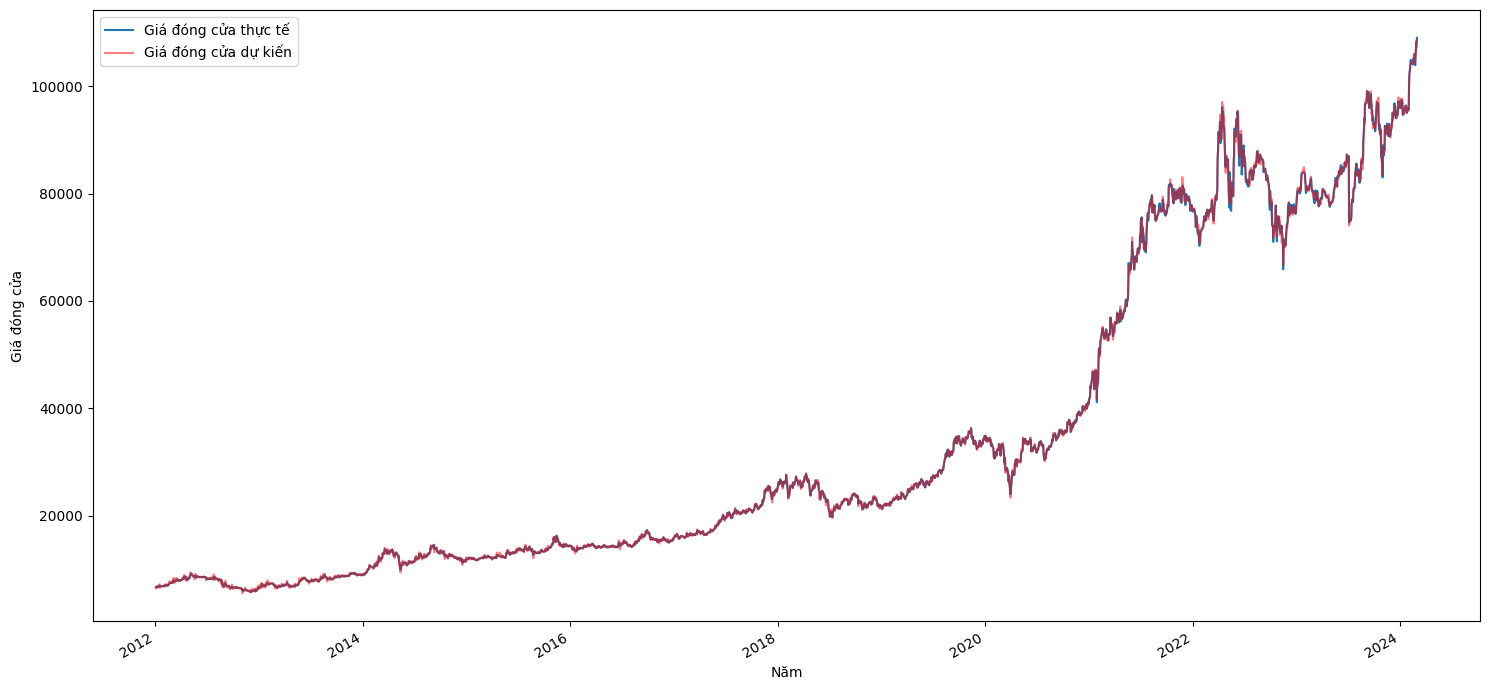

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
df['Price'].plot(alpha=1, label = 'Giá đóng cửa thực tế')
ax.plot(result_df['Price'], color='red', alpha=0.5, label = 'Giá đóng cửa dự kiến')
ax.set_xlabel('Năm')
ax.set_ylabel('Giá đóng cửa')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Tái sử dụng mô hình

In [24]:
def get_df(date):
    test_df = pd.read_csv('./data/FPT Historical Data_Demo.csv')

    query_result = test_df[test_df['Date'] == date]
    
    if query_result.empty:
        print(f"No data found for date: {date}")
        return None 

    return query_result.drop('Date', axis = 1)

predict_value = model.predict(get_df('2024-02-29'))

print(predict_value.round(0))

[108581.]
